In [10]:
import numpy as np

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=float)

y = np.array([[0],
              [1],
              [1],
              [0]], dtype=float)


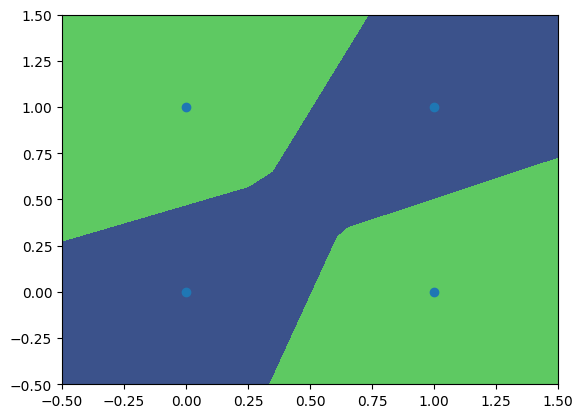

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[1],[1],[0]], dtype=float)

model = Sequential([
    Input(shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.1), loss='binary_crossentropy')
model.fit(X, y, epochs=1000, verbose=0)

xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200),
                     np.linspace(-0.5,1.5,200))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid, verbose=0).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, preds, levels=[0,0.5,1])
plt.scatter(X[:,0], X[:,1])
plt.show()


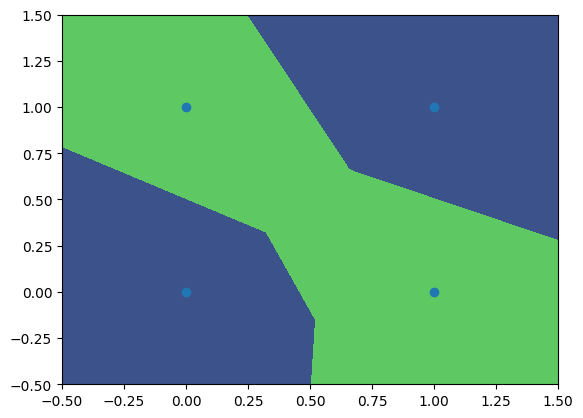

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([[0.],[1.],[1.],[0.]])

class XORNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,8)
        self.fc2 = nn.Linear(8,1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

model = XORNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

for _ in range(1000):
    optimizer.zero_grad()
    loss = criterion(model(X), y)
    loss.backward()
    optimizer.step()

xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200),
                     np.linspace(-0.5,1.5,200))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    preds = model(grid).numpy().reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, preds, levels=[0,0.5,1])
plt.scatter(X[:,0], X[:,1])
plt.show()


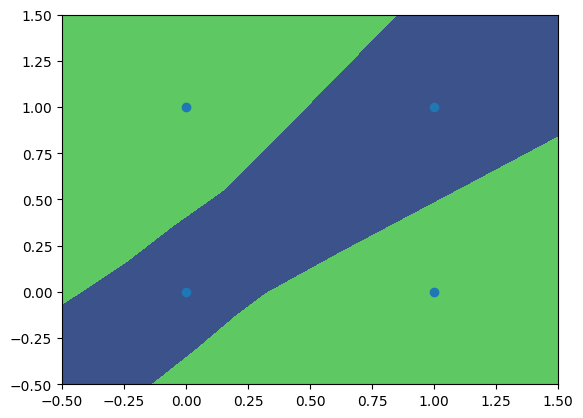

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = tf.constant([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = tf.constant([[0.],[1.],[1.],[0.]])

W1 = tf.Variable(tf.random.normal([2,8]))
b1 = tf.Variable(tf.zeros([8]))
W2 = tf.Variable(tf.random.normal([8,1]))
b2 = tf.Variable(tf.zeros([1]))

opt = tf.optimizers.Adam(0.1)

def model(x):
    h = tf.nn.relu(tf.matmul(x, W1) + b1)
    return tf.nn.sigmoid(tf.matmul(h, W2) + b2)

for _ in range(1000):
    with tf.GradientTape() as tape:
        loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, model(X)))
    grads = tape.gradient(loss, [W1,b1,W2,b2])
    opt.apply_gradients(zip(grads, [W1,b1,W2,b2]))

xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200),
                     np.linspace(-0.5,1.5,200))
grid = tf.constant(np.c_[xx.ravel(), yy.ravel()], dtype=tf.float32)
preds = model(grid).numpy().reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, preds, levels=[0,0.5,1])
plt.scatter(X.numpy()[:,0], X.numpy()[:,1])
plt.show()


Interpretation:


In this experiment, a Multi-Layer Perceptron was successfully implemented using Keras, PyTorch, and TensorFlow to learn the XOR Boolean function. Since XOR is not linearly separable, the use of a hidden layer with non-linear activation was essential. All three implementations correctly learned the XOR mapping, as confirmed by accurate predictions, decreasing loss curves, and non-linear decision boundary plots. The results also showed that hyperparameters such as learning rate, number of neurons, and epochs significantly influence convergence and performance. Overall, the experiment demonstrates the effectiveness of MLPs in solving non-linear classification problems and highlights the consistency of different deep learning frameworks in achieving similar results.